# COVID-19 Death Rate and Happiness Analysis
--------------------------------------------

#### Import the modules.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print ("Modules are imported.")

Modules are imported.


#### Import the CSV files.

In [3]:
covid_deaths_dataset_csv = pd.read_csv("/Users/ada/Desktop/Programming/python/personal/Covid Deaths vs. Happiness/covid19_deaths_dataset.csv")
covid_deaths_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
covid_deaths_dataset_csv.shape

(266, 104)

#### Delete the unnecessary columns.

In [85]:
covid_deaths_dataset_csv.drop(["Lat", "Long"], axis=1, inplace=True)
covid_deaths_dataset_csv.head(15)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,147,152,165,176,185,192,197,207,214,218
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,24,24,24,27,28,28,29,30,30,32
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,0,0,0,0,0,0,0,0,...,26,26,31,33,33,34,34,39,40,41


#### Aggregate the data to countries.

In [109]:
covid_deaths_aggregated = covid_deaths_dataset_csv.groupby("Country/Region").sum()
covid_deaths_aggregated.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### Find the maximum derivative of death rates for all countries.

In [110]:
countries = list(covid_deaths_aggregated.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(covid_deaths_aggregated.loc[c].diff().max())
covid_deaths_aggregated["Maximum death rate"] = max_death_rates

death_data = pd.DataFrame(covid_deaths_aggregated["Maximum death rate"])
death_data.head(10)

,Maximum death rate
Country/Region,
Afghanistan,32.0000
Albania,4.0000
Algeria,30.0000
Andorra,4.0000
Angola,29.0766
Antigua and Barbuda,61.7964
Argentina,63.6167
Armenia,4.9691
Australia,1385.8318


#### Import the Worlwide Happiness Report.

In [5]:
happiness_dataset_csv = pd.read_csv("/Users/ada/Desktop/Programming/python/personal/Covid Deaths vs. Happiness/worldwide_happiness_report.csv")
happiness_dataset_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Delete the useless columns.

In [112]:
useless_columns = ["Score", "Overall rank", "Generosity", "Perceptions of corruption"]

In [113]:
happiness_dataset_csv.drop(useless_columns, axis=1, inplace=True)
happiness_dataset_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


#### Set the indices to countries and control the variables.

In [114]:
happiness_dataset_csv.set_index("Country or region", inplace=True)
happiness_dataset_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [115]:
happiness_dataset_csv.shape

(156, 4)

In [116]:
death_data.head()

,Maximum death rate
Country/Region,
Afghanistan,32.0000
Albania,4.0000
Algeria,30.0000
Andorra,4.0000
Angola,29.0766


In [117]:
death_data.shape

(187, 1)

#### Combine the two data sets.

In [118]:
data = death_data.join(happiness_dataset_csv, how="inner")

In [119]:
data.head()

,Maximum death rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,32.0000,0.350,0.517,0.361,0.000
Albania,4.0000,0.947,0.848,0.874,0.383
Algeria,30.0000,1.002,1.160,0.785,0.086
Argentina,63.6167,1.092,1.432,0.881,0.471
Armenia,4.9691,0.850,1.055,0.815,0.283


#### Get the correlation matrix.

In [120]:
data.corr()

,Maximum death rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum death rate,1.000000,0.241616,0.197833,0.307583,0.172166
GDP per capita,0.241616,1.000000,0.759468,0.863062,0.394603
Social support,0.197833,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.307583,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.172166,0.394603,0.456246,0.427892,1.000000


#### Draw the charts for each correlation.

<AxesSubplot:xlabel='GDP per capita', ylabel='Maximum death rate'>

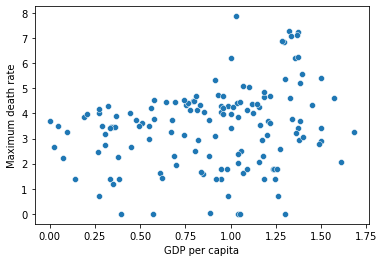

In [121]:
x = data["GDP per capita"]
y = data["Maximum death rate"]
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='GDP per capita', ylabel='Maximum death rate'>

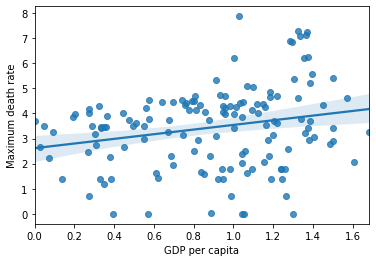

In [122]:
sns.regplot(x, np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='Maximum death rate'>

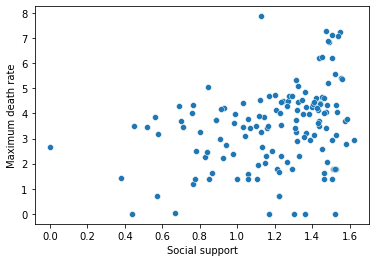

In [123]:
x = data["Social support"]
y = data["Maximum death rate"]
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='Maximum death rate'>

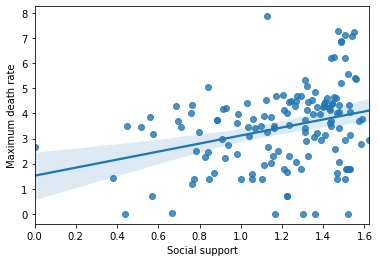

In [124]:
sns.regplot(x, np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Maximum death rate'>

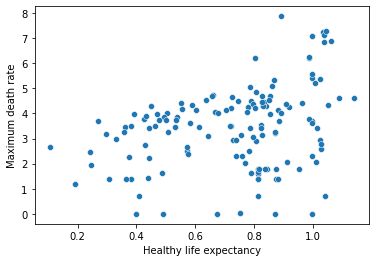

In [125]:
x = data["Healthy life expectancy"]
y = data["Maximum death rate"]
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Maximum death rate'>

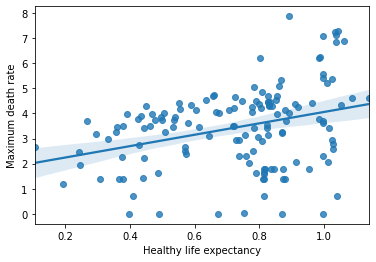

In [126]:
sns.regplot(x, np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Maximum death rate'>

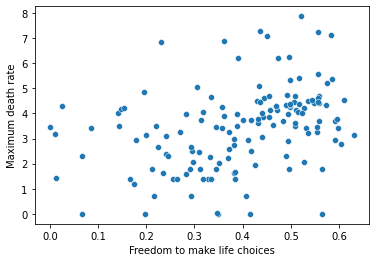

In [127]:
x = data["Freedom to make life choices"]
y = data["Maximum death rate"]
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Maximum death rate'>

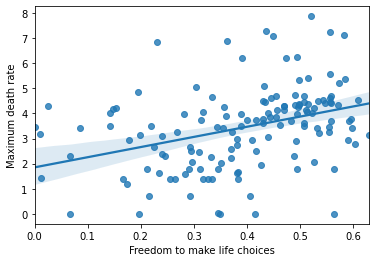

In [128]:
sns.regplot(x, np.log(y))